# Occupancy-abundance models in `unmarked`

### Ken Kellner

## Introduction

This model is in development and so is not available in `unmarked` from CRAN.

In [3]:
# remotes::install_github("rbchan/unmarked", ref="occuRNMulti")
library(unmarked)

We will use the function `occuRNMulti`*

\* *Name will almost certainly change*

![](occuRNMulti.png)

## Model support

Supports up to 3 species, and most possible combinations:

sp1 --> sp2

sp1 --> sp2 --> sp3

sp1 --> sp3 <-- sp2

sp2 <-- sp1 --> sp3

sp1 --> sp2 --> sp3 & sp1 --> sp3

## Set up the input data

Mesocarnivores again.

In [4]:
data(MesoCarnivores)
lapply(MesoCarnivores, head) # look at raw data

X1,X2,X3
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
X1,X2,X3
0,0,0
0,0,0
0,0,0


### Formatting the data

We will create an `unmarkedFrameOccuMulti` exactly as we did in the multispecies occupancy section.

![](umf_om_construction.png)

### y list

We'll run a two-species model

In [5]:
ylist <- MesoCarnivores[c(2:3)]
lapply(ylist, head) # look at first few rows

X1,X2,X3
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
0,0,0
X1,X2,X3
0,0,0
0,0,0
0,0,1


### Site covariates

The last element of the `MesoCarnivores` list is a data frame of site covariates:

In [6]:
site_covs <- MesoCarnivores$sitecovs
head(site_covs)

,Dist_5km,HDens_5km,Latitude,Longitude,People_site,Trail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.04,9.345258,0.3899441,-0.7723958,0.857,1
2,0.03,9.499197,0.3899250,-0.7723920,0.002,0
3,0.03,9.647173,0.3899111,-0.7723954,0.387,1
4,0.03,9.598066,0.3899166,-0.7723972,0.003,0
5,0.03,9.607825,0.3899179,-0.7724004,0.000,0
6,0.03,9.748791,0.3899058,-0.7724046,0.443,1


### Construct the unmarked frame

In [7]:
umf <- unmarkedFrameOccuMulti(y=ylist, siteCovs=site_covs)
head(umf)

Data frame representation of unmarkedFrame object.
Only showing observation matrix for species 1.
   y.1 y.2 y.3 Dist_5km HDens_5km  Latitude  Longitude People_site Trail
1    0   0   0     0.04  9.345258 0.3899441 -0.7723958       0.857     1
2    0   0   0     0.03  9.499197 0.3899250 -0.7723920       0.002     0
3    0   0   0     0.03  9.647173 0.3899111 -0.7723954       0.387     1
4    0   0   0     0.03  9.598066 0.3899166 -0.7723972       0.003     0
5    0   0   0     0.03  9.607825 0.3899179 -0.7724004       0.000     0
6    0   0   0     0.03  9.748791 0.3899058 -0.7724046       0.443     1
7    0   0   0     0.03  9.715359 0.3899097 -0.7724065       0.000     0
8    0   0   0     0.03  9.685091 0.3899135 -0.7724103       0.000     0
9    0   0   0     0.04  9.051558 0.3899955 -0.7724561       0.002     0
10   0   0   0     0.04  9.031836 0.3899971 -0.7724504       0.000     0

In [8]:
summary(umf)

unmarkedFrame Object

1437 sites
2 species: coyote redfox 
Maximum number of observations per site: 3 
Mean number of observations per site:
coyote: 3  redfox: 3  
Sites with at least one detection:
coyote: 401  redfox: 161  
Tabulation of y observations:
coyote:
   0    1 
3685  626 
redfox:
   0    1 
4054  257 

Site-level covariates:
    Dist_5km         HDens_5km           Latitude        Longitude      
 Min.   :0.00000   Min.   :  0.0000   Min.   :0.3454   Min.   :-0.8539  
 1st Qu.:0.00000   1st Qu.:  0.2073   1st Qu.:0.3567   1st Qu.:-0.8009  
 Median :0.00000   Median :  0.7310   Median :0.3753   Median :-0.7940  
 Mean   :0.01419   Mean   :  8.4532   Mean   :0.3726   Mean   :-0.7969  
 3rd Qu.:0.02000   3rd Qu.:  3.0219   3rd Qu.:0.3863   3rd Qu.:-0.7801  
 Max.   :0.13000   Max.   :186.6694   Max.   :0.3967   Max.   :-0.7690  
  People_site          Trail       
 Min.   :0.00000   Min.   :0.0000  
 1st Qu.:0.00000   1st Qu.:0.0000  
 Median :0.00000   Median :0.0000  
 Mean

## Set up the formulas

![](occuRNMulti.png)

### `stateformulas`

A named list with one element per species.

The elements should be in order of dominance, starting with the top-level dominant species.

**For dominant species:**

The list element contains a single formula for the abundance model.

```r
coyote = ~1
```

$$\mathrm{log}(\lambda_{coy}) = \beta_{0,coy}$$


**For subordinate species:**

The list element is itself a list of multiple formulas.

* One formula for the part of the linear predictor not related to the dominant species
* One formula representing the part of the linear predictor corresponding to each dominant species

```r
redfox = list(~1, coyote = ~1)
```

$$\mathrm{log}(\lambda_{fox}) = \beta_{0,fox} + (\gamma_{0,coy->fox}) \cdot N_{coy}$$

With covariates:

```r
redfox = list(~x, coyote = ~z)
```

$$\mathrm{log}(\lambda_{fox}) = \beta_{0,fox} + \beta_{x,fox} + (\gamma_{0,coy->fox} + \gamma_{z,coy->fox} \cdot z) \cdot N_{coy}$$

In [12]:
sf <- list(coyote = ~1,
           redfox = list(~1, coyote = ~1))

### `detformulas`

This one is easier, there is just one formula per species, so there should be 2 total.

Intercept-only models for both species:

In [11]:
df <- list(coyote = ~1, redfox = ~1)
df

$coyote
~1

$redfox
~1


### `modelOccupancy`

A character vector of species names for which you want to model occupancy rather than abundance (must be subordinate species)

```r
modelOccupancy = 'redfox'
```

## Run `occuRNMulti`

We now have all the pieces we need (`unmarkedFrameOccuMulti`, `stateformulas`, `detformulas`) needed to run a model.

In [13]:
mod_null <- occuRNMulti(detformulas=df, stateformulas=sf, data=umf, modelOccupancy="redfox")
summary(mod_null)


Call:
occuRNMulti(detformulas = df, stateformulas = sf, data = umf, 
    modelOccupancy = "redfox")

Abundance (log-scale):
 Estimate     SE     z  P(>|z|)
   -0.773 0.0683 -11.3 9.97e-30

Occupancy (logit-scale):
                            Estimate    SE      z  P(>|z|)
[redfox] (Intercept)          -2.326 0.144 -16.15 1.15e-58
[redfox:coyote] (Intercept)    0.798 0.148   5.38 7.54e-08

Detection (logit-scale):
                     Estimate     SE     z  P(>|z|)
[coyote] (Intercept)   -0.654 0.0946 -6.91 4.91e-12
[redfox] (Intercept)   -0.251 0.1181 -2.13 3.34e-02

AIC: 4841.649 
Number of sites: 1437
optim convergence code: 0
optim iterations: 34 
Bootstrap iterations: 0 



## Model with covariates

* Effects of disturbance, housing density, longitude, and latitude on both species
* Effect of housing density on coyote -> red fox interaction
* Effect of trail on both detection models

In [14]:
both <- ~scale(Dist_5km) + scale(Longitude) + scale(Latitude) + scale(HDens_5km)

sf <- list(
  coyote = both,
  redfox = list(both, coyote = ~scale(HDens_5km))
)

In [15]:
df <- list(coyote = ~Trail, redfox = ~Trail)

In [16]:
mod_covs <- occuRNMulti(detformulas=df, stateformulas=sf, data=umf, modelOccupancy="redfox", threads=3)
summary(mod_covs)


Call:
occuRNMulti(detformulas = df, stateformulas = sf, data = umf, 
    modelOccupancy = "redfox", threads = 3)

Abundance (log-scale):
                          Estimate     SE      z  P(>|z|)
[coyote] (Intercept)       -0.1373 0.0870 -1.578 1.14e-01
[coyote] scale(Dist_5km)   -0.1181 0.0563 -2.099 3.58e-02
[coyote] scale(Longitude)  -0.3209 0.0688 -4.664 3.10e-06
[coyote] scale(Latitude)    0.0182 0.0645  0.281 7.78e-01
[coyote] scale(HDens_5km)   0.1678 0.0431  3.898 9.71e-05

Occupancy (logit-scale):
                                 Estimate    SE      z  P(>|z|)
[redfox] (Intercept)               -3.960 0.468 -8.464 2.58e-17
[redfox] scale(Dist_5km)            1.561 0.295  5.297 1.18e-07
[redfox] scale(Longitude)           3.220 0.520  6.190 6.02e-10
[redfox] scale(Latitude)            0.659 0.307  2.142 3.22e-02
[redfox] scale(HDens_5km)           0.184 0.376  0.491 6.23e-01
[redfox:coyote] (Intercept)         1.055 0.276  3.819 1.34e-04
[redfox:coyote] scale(HDens_5km)    0.24

### Comparison with `NIMBLE`

Read in saved results from the same model fit with `NIMBLE`:

In [17]:
(nim_sum <- as.data.frame(readRDS('nimble_summary.Rds')))

,est,low,up
,<dbl>,<dbl>,<dbl>
beta0D,-0.19891554,-0.35876383,-0.03462651
betaD[1],-0.12064900,-0.23338144,-0.01241478
betaD[2],-0.31869573,-0.45214174,-0.18109203
betaD[3],0.01945794,-0.10578639,0.14878109
betaD[4],0.16373145,0.07422315,0.24548744
beta0S,-3.83987328,-4.81353742,-3.02072568
betaS[1],1.49803540,0.96853261,2.08120039
betaS[2],3.07480361,2.14995026,4.14798949
betaS[3],0.72436867,0.12368045,1.37402932


In [18]:
nim_sum$type <- "nimble"

unm_sum <- data.frame(est = coef(mod_covs),
                      low = coef(mod_covs) - 1.96 * SE(mod_covs),
                      up = coef(mod_covs) + 1.96 * SE(mod_covs),
                      type = "unmarked")

all_sum <- rbind(nim_sum, unm_sum)
all_sum$par <- rownames(nim_sum)

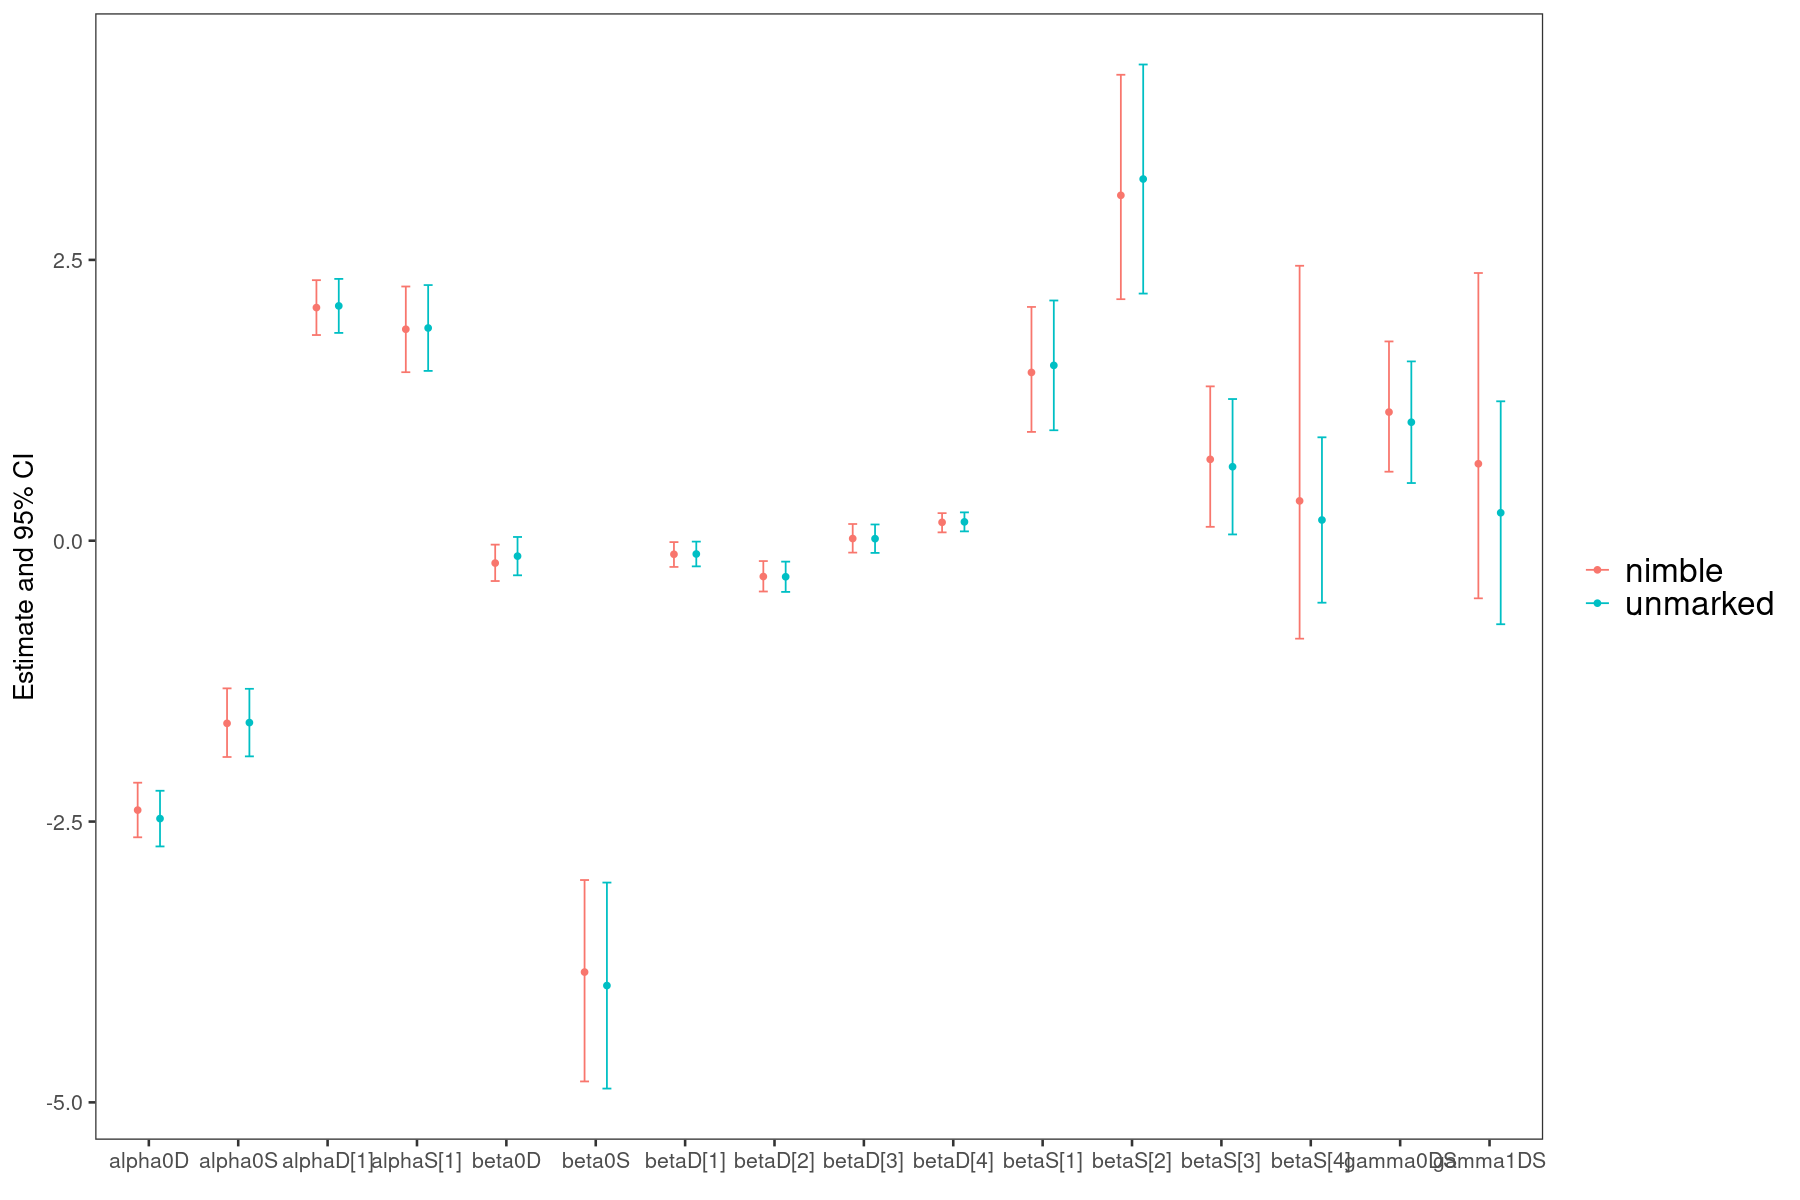

In [19]:
library(ggplot2)
options(repr.plot.width=15, repr.plot.height=10)
pos <- position_dodge(0.5)

ggplot(data = all_sum, aes(x=par, col=type)) +
  geom_errorbar(aes(ymin=low, ymax=up), width=0.2, position=pos) +
  geom_point(aes(y=est), position=pos) +
  theme_bw(base_size=16) +
  labs(col=element_blank(), x=element_blank(), y="Estimate and 95% CI") +
  theme(panel.grid = element_blank(), 
        legend.position.inside=c(0.8,0.2), legend.text=element_text(size=20))

## Plotting effect of `Hdens_5km`

Make a sequence of values and plug into a `newdata` data frame.

In [20]:
hdens_rng <- range(siteCovs(umf)$HDens_5km)
hdens_seq <- seq(hdens_rng[1], hdens_rng[2], length.out=100)

nd <- data.frame(HDens_5km = hdens_seq, 
                 Dist_5km = mean(siteCovs(umf)$Dist_5km),
                 Longitude = mean(siteCovs(umf)$Longitude),
                 Latitude = mean(siteCovs(umf)$Latitude),
                 Trail = 0)

head(nd)

,HDens_5km,Dist_5km,Longitude,Latitude,Trail
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.000000,0.01418928,-0.796942,0.372565,0
2,1.885550,0.01418928,-0.796942,0.372565,0
3,3.771100,0.01418928,-0.796942,0.372565,0
4,5.656650,0.01418928,-0.796942,0.372565,0
5,7.542199,0.01418928,-0.796942,0.372565,0
6,9.427749,0.01418928,-0.796942,0.372565,0


Run `predict`. It generates a list of dataframes, one per species.

In [21]:
pr <- predict(mod_covs, type = "state", newdata = nd)
lapply(pr, tail)

Bootstrapping confidence intervals with 100 samples



,Predicted,SE,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>
95,2.353946,0.8266677,1.312493,4.355653
96,2.380214,0.8457662,1.319075,4.435659
97,2.406775,0.8652509,1.325690,4.517138
98,2.433633,0.8851290,1.332338,4.600117
99,2.460790,0.9054082,1.339020,4.684624
100,2.488250,0.9260963,1.345735,4.770687
,Predicted,SE,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>
95,0.9561608,0.3587184,0.002652104,0.9999995


Note that the predictions will match the type of model for each species.

So `coyote` represents abundances, and `redfox` represents occupancy, since we set `modelOccupancy = "redfox"`.

### Create plot

First combine the outputs into a single data frame for `ggplot2`.

In [22]:
plot_data <- do.call(rbind, pr)
plot_data$species <- rep(c("coyote", "redfox"), each=100)
plot_data$Hdens <- hdens_seq
head(plot_data)

,Predicted,SE,upper,lower,species,Hdens
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
coyote.1,0.8293996,0.08263473,0.6963272,1.011962,coyote,0.000000
coyote.2,0.8386549,0.08352508,0.7057672,1.023095,coyote,1.885550
coyote.3,0.8480136,0.08451377,0.7153564,1.034361,coyote,3.771100
coyote.4,0.8574766,0.08560391,0.7215977,1.045762,coyote,5.656650
coyote.5,0.8670453,0.08679842,0.7260565,1.057877,coyote,7.542199
coyote.6,0.8767207,0.08809999,0.7305462,1.070605,coyote,9.427749


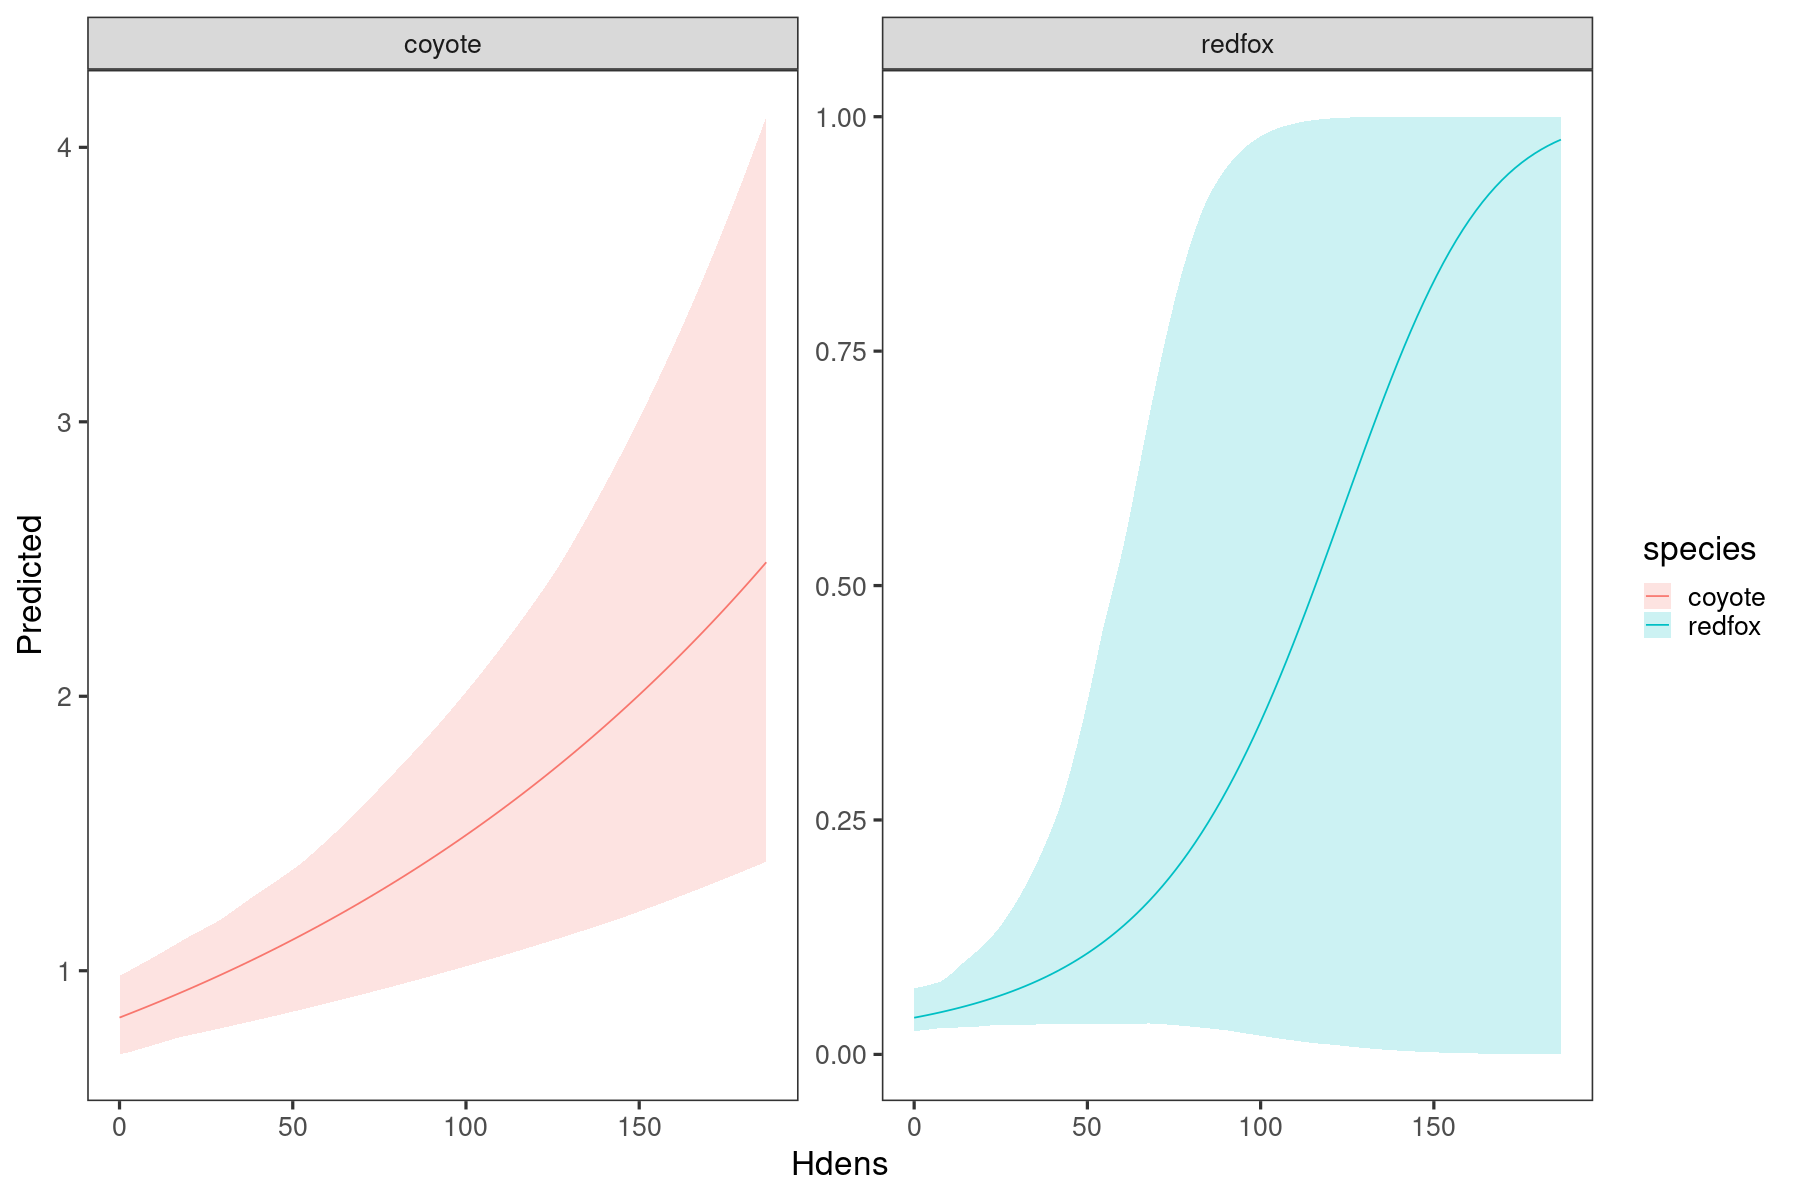

In [20]:
library(ggplot2)

ggplot(data = plot_data, aes(x = Hdens)) +
  geom_ribbon(aes(ymin = lower, ymax = upper, fill=species), alpha=0.2) +
  geom_line(aes(y = Predicted, col=species)) +
  facet_wrap("species", scales='free') +
  theme_bw(base_size=20) +
  theme(panel.grid = element_blank())

The huge error bars for red fox are likely due to the high uncertainty in the interaction parameter estimates.

### Fix abundance of a species

We might want to get predictions for a specific abundance value of a dominant species.

For example here, with coyote absent (abundance = 0)

We just need to add the species abundance to the `newdata` data frame:

In [23]:
nd$coyote <- 0
pr <- predict(mod_covs, type = "state", newdata = nd)
lapply(pr, tail)

Bootstrapping confidence intervals with 100 samples



,Predicted,SE,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>
95,2.353946,0.6968732,1.424766,4.043279
96,2.380214,0.7126926,1.433836,4.107781
97,2.406775,0.7288180,1.442964,4.173325
98,2.433633,0.7452550,1.452150,4.239928
99,2.460790,0.7620092,1.461395,4.307607
100,2.488250,0.7790863,1.470699,4.376379
,Predicted,SE,upper,lower
,<dbl>,<dbl>,<dbl>,<dbl>
95,0.05373818,0.2319798,0.0005879989,0.8023567


Note that while still high, the SEs around the occupancy estimates for red fox are much smaller than before. That's because we are "zeroing out" the interaction terms and their associated uncertainty.

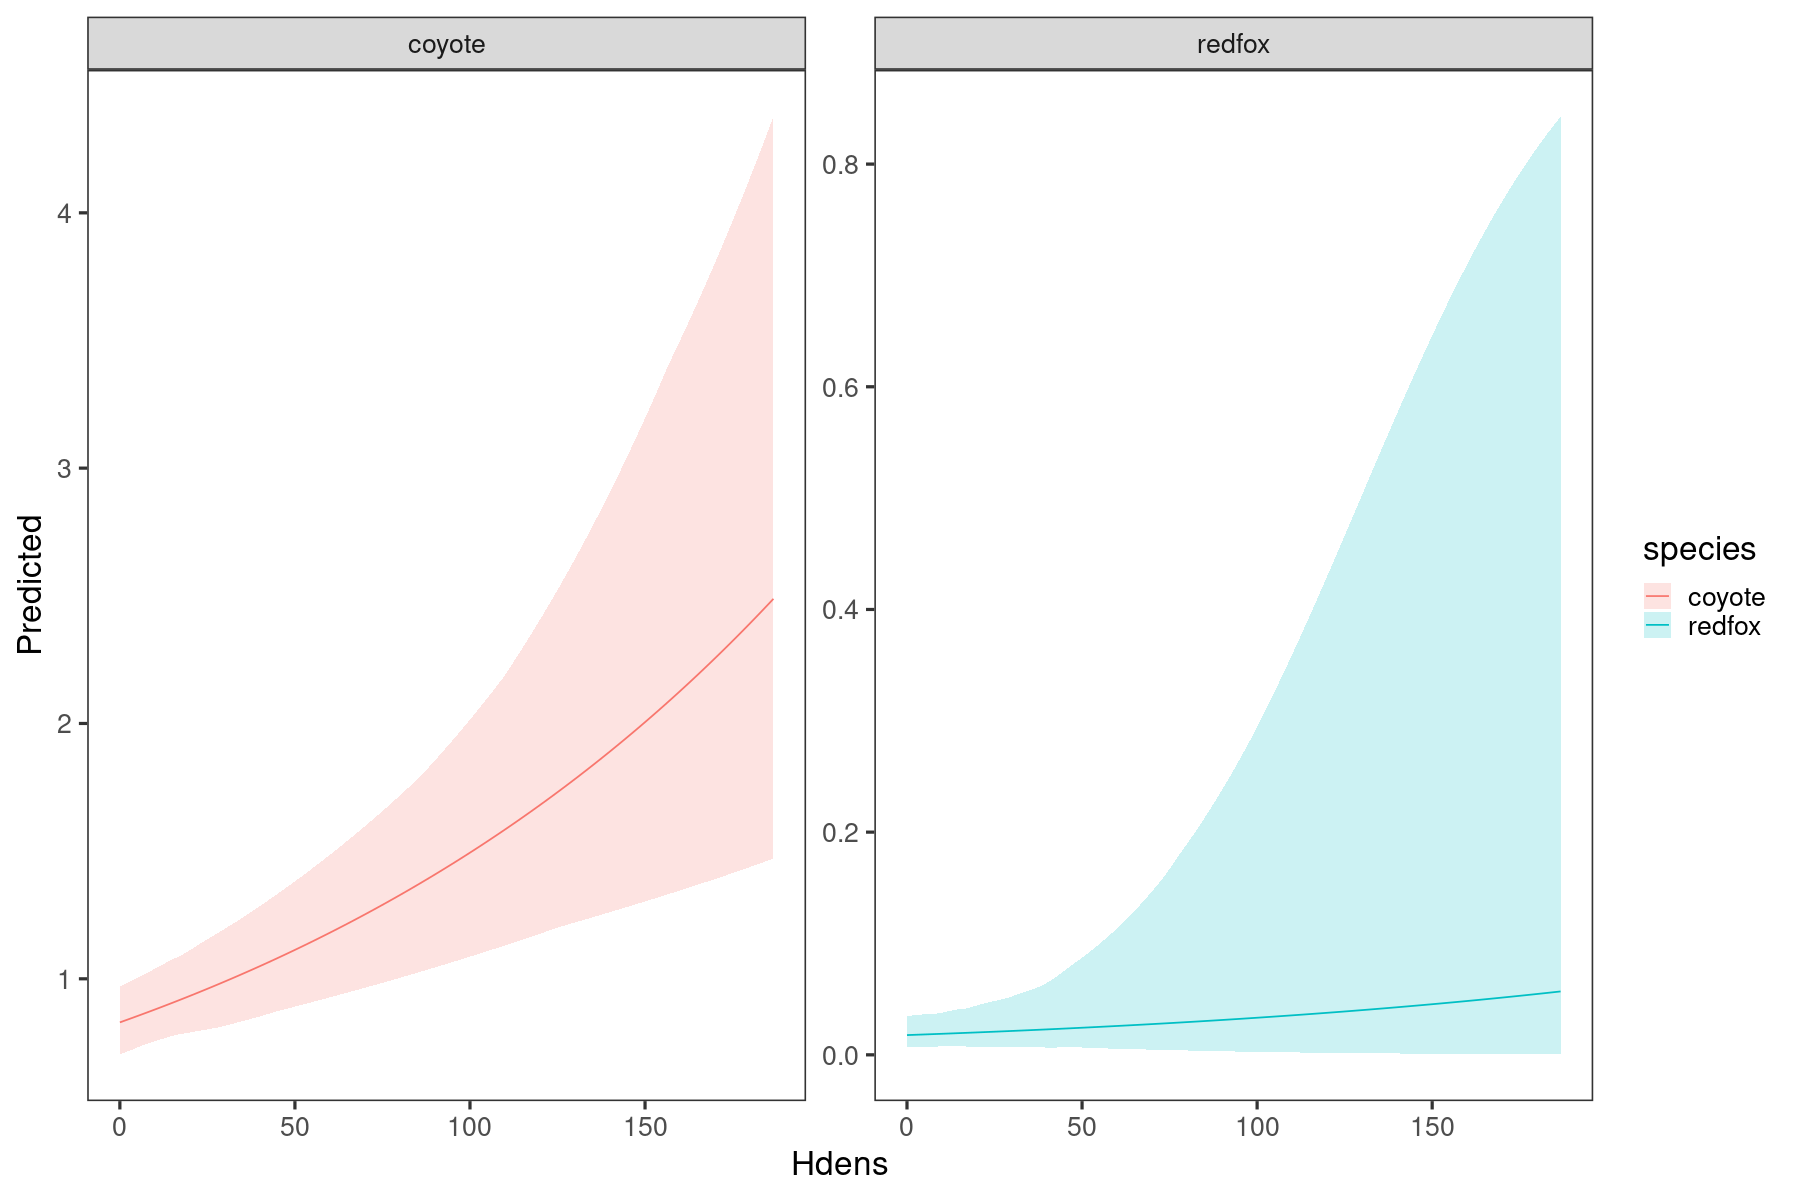

In [24]:
plot_data <- do.call(rbind, pr)
plot_data$species <- rep(c("coyote", "redfox"), each=100)
plot_data$Hdens <- hdens_seq
ggplot(data = plot_data, aes(x = Hdens)) +
  geom_ribbon(aes(ymin = lower, ymax = upper, fill=species), alpha=0.2) +
  geom_line(aes(y = Predicted, col=species)) +
  facet_wrap("species", scales='free') +
  theme_bw(base_size=20) +
  theme(panel.grid = element_blank())

Overall red fox predicted occupancy is lower when coyote is absent.

That makes sense given the positive interaction intercept in the model.

If you want to try `occuRNMulti` get in touch or install yourself using the code I provided at the beginning.

There are definitely missing features and probably bugs!